In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dl_data/data/pima-indians-diabetes3.csv')
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df["diabetes"].value_counts()
# 0 : 당뇨병 x, 1 : 당뇨병 o

diabetes
0    500
1    268
Name: count, dtype: int64

In [ ]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr() # 상관계수 확인

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# 데이터 간의 상관 관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(15,15))   #그래프의 크기를 정합니다.

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

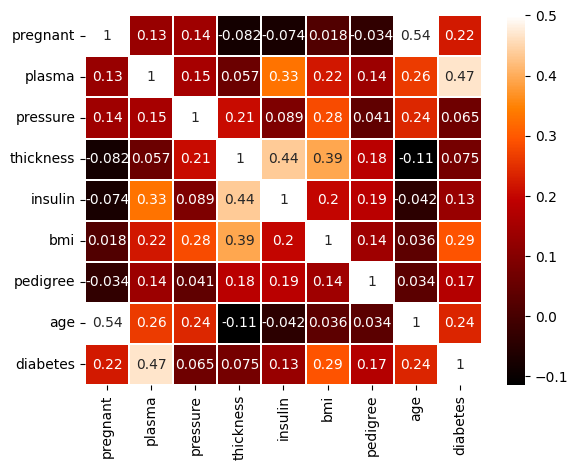

In [ ]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [ ]:
df.diabetes==0

0      False
1       True
2      False
3       True
4      False
       ...  
763     True
764     True
765     True
766    False
767     True
Name: diabetes, Length: 768, dtype: bool

In [ ]:
df.plasma[df.diabetes==0] # 당뇨병이 아닌 사람의 plasma(혈장) 열의 값
df.plasma[df.diabetes==1]

0      148
2      183
4      137
6       78
8      197
      ... 
755    128
757    123
759    190
761    170
766    126
Name: plasma, Length: 268, dtype: int64

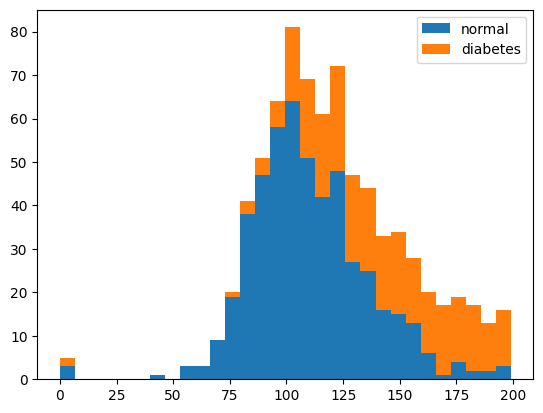

In [ ]:
#plasma를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다.
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

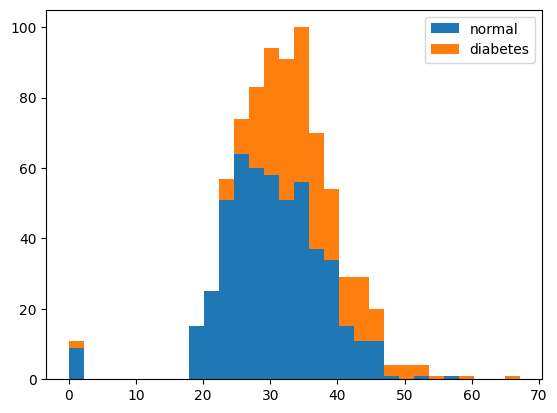

In [ ]:
#BMI를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다.
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

In [ ]:
df.columns

Index(['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'bmi',
       'pedigree', 'age', 'diabetes'],
      dtype='object')

In [ ]:
# 세부 정보를 X로 지정합니다.
X = df.iloc[:,0:8]
# 당뇨병 여부를 Y로 지정합니다.
y = df.iloc[:,8]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu', name='Input_layer'))
model.add(Dense(8, activation='relu', name='hidden_layer'))
model.add(Dense(1, activation='sigmoid', name='Output_layer'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 16)                144       
                                                                 
 hidden_layer (Dense)        (None, 8)                 136       
                                                                 
 Output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 2진 분류, 주로 adam사용, accuracy : 정확도 확인(train data에 대한 정확도이므로 정확한건 아님, 참고용)

In [ ]:
history = model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 2s 3ms/step - loss: 5.7607 - accuracy: 0.6120
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 1.0579 - accuracy: 0.5469
Epoch 3/100
154/154 [==============================] - 1s 3ms/step - loss: 0.8842 - accuracy: 0.5638
Epoch 4/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7962 - accuracy: 0.5651
Epoch 5/100
154/154 [==============================] - 1s 3ms/step - loss: 0.7423 - accuracy: 0.5924
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.7180 - accuracy: 0.5911
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.6510
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6406
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.6523
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6565 - accura

In [ ]:
history.history
# accuracy 내역

{'loss': [5.760654449462891,
  1.057895541191101,
  0.8842092156410217,
  0.7961816191673279,
  0.7423328757286072,
  0.718005359172821,
  0.6933636665344238,
  0.673766553401947,
  0.6673139929771423,
  0.656475841999054,
  0.6422380805015564,
  0.6423717737197876,
  0.6278302669525146,
  0.6201333999633789,
  0.6151192784309387,
  0.6050207614898682,
  0.6010569930076599,
  0.6010400056838989,
  0.5963140726089478,
  0.6031376719474792,
  0.5912964344024658,
  0.5853462219238281,
  0.5886692404747009,
  0.5970173478126526,
  0.5880463719367981,
  0.5897558331489563,
  0.5840039849281311,
  0.5880194306373596,
  0.5886687636375427,
  0.5752323269844055,
  0.57466059923172,
  0.571647047996521,
  0.5676291584968567,
  0.5681665539741516,
  0.5622378587722778,
  0.5673789381980896,
  0.5663018226623535,
  0.5526864528656006,
  0.5584421753883362,
  0.552761971950531,
  0.5529422163963318,
  0.5493205189704895,
  0.5459313988685608,
  0.5479740500450134,
  0.5480930209159851,
  0.5571621

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dl_data/data/iris3.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


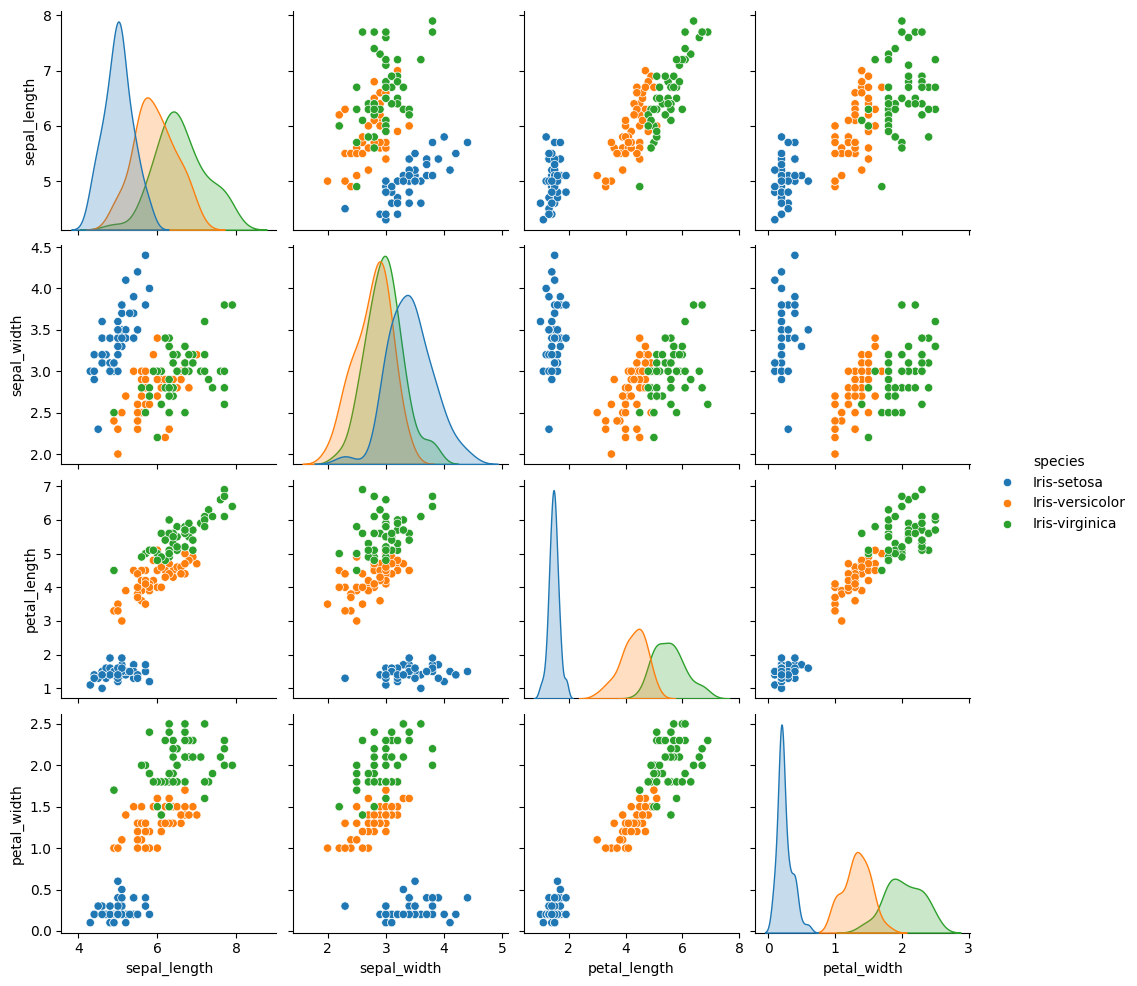

In [ ]:
sns.pairplot(df, hue='species')

In [ ]:
# 속성을 X, 클래스를 y로 저장합니다.
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [ ]:
# X와 y의 첫 5줄을 출력해 보겠습니다.
print(X[0:5])
print(y[0:5])

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [ ]:
# 원-핫 인코딩 처리를 합니다.
y = pd.get_dummies(y)
y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [ ]:
model = Sequential()

model.add(Dense(16,  input_dim=4, activation='relu')) # 16*4+b(16)
model.add(Dense(8, activation='relu')) # 8*16+b(8)
model.add(Dense(3, activation='softmax')) # 3개로 다중분류, softmax

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                80        
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# softmax : categorical_crossentropy

In [ ]:
history=model.fit(X, y, epochs=30, batch_size=5)

Epoch 1/30
30/30 [==============================] - 2s 2ms/step - loss: 0.7732 - accuracy: 0.7267
Epoch 2/30
30/30 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.8667
Epoch 3/30
30/30 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.8600
Epoch 4/30
30/30 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.8533
Epoch 5/30
30/30 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.8800
Epoch 6/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.9067
Epoch 7/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.8600
Epoch 8/30
30/30 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.9067
Epoch 9/30
30/30 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.9000
Epoch 10/30
30/30 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.9467
Epoch 11/30
30/30 [

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dl_data/data/sonar3.csv', header=None)
df # 암석 : 0, 광석 : 1(60번째열)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [ ]:
df[60].value_counts()

60
1    111
0     97
Name: count, dtype: int64

In [ ]:
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [ ]:
model = Sequential()
model.add(Dense(32,  input_dim=60, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 1s 3ms/step - loss: 0.7019 - accuracy: 0.5000
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6731
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6923
Epoch 4/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.7260
Epoch 5/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.6971
Epoch 6/200
21/21 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.7548
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.7933
Epoch 8/200
21/21 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.7404
Epoch 9/200
21/21 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7788
Epoch 10/200
21/21 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7740
Epoch 11/

In [ ]:
# sonar data를 train/test 분리
# train 데이터로 모델링
# test 데이터로 모델평가

In [ ]:
df
X
y
# 208건 : 70% train, 30% test

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: 60, Length: 208, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=625)
# train_size 는 자동으로 0.7
# random_state 값을 주면 할 때마다 값이 변하지않게 고정

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
26,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0086,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062
106,0.0331,0.0423,0.0474,0.0818,0.0835,0.0756,0.0374,0.0961,0.0548,0.0193,...,0.0133,0.0078,0.0174,0.0176,0.0038,0.0129,0.0066,0.0044,0.0134,0.0092
192,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,...,0.0185,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007
171,0.0179,0.0136,0.0408,0.0633,0.0596,0.0808,0.2090,0.3465,0.5276,0.5965,...,0.0086,0.0123,0.0060,0.0187,0.0111,0.0126,0.0081,0.0155,0.0160,0.0085
18,0.0270,0.0092,0.0145,0.0278,0.0412,0.0757,0.1026,0.1138,0.0794,0.1520,...,0.0045,0.0084,0.0010,0.0018,0.0068,0.0039,0.0120,0.0132,0.0070,0.0088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0209,0.0278,0.0115,0.0445,0.0427,0.0766,0.1458,0.1430,0.1894,0.1853,...,0.0133,0.0096,0.0014,0.0049,0.0039,0.0029,0.0078,0.0047,0.0021,0.0011
193,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0209,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016
156,0.0047,0.0059,0.0080,0.0554,0.0883,0.1278,0.1674,0.1373,0.2922,0.3469,...,0.0129,0.0095,0.0126,0.0069,0.0039,0.0068,0.0060,0.0045,0.0002,0.0029
28,0.0100,0.0275,0.0190,0.0371,0.0416,0.0201,0.0314,0.0651,0.1896,0.2668,...,0.0118,0.0088,0.0104,0.0036,0.0088,0.0047,0.0117,0.0020,0.0091,0.0058


In [ ]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 1s 3ms/step - loss: 0.7026 - accuracy: 0.5241
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5310
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6276
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.6897
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6759
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6966
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.7379
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7379
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.8069
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.8207
Epoch 11/

In [ ]:
model.predict(X_test)

2/2 [==============================] - 0s 10ms/step


array([[1.0000000e+00],
       [1.5237949e-05],
       [6.8946779e-01],
       [9.8674846e-01],
       [9.9894702e-01],
       [9.9638885e-01],
       [5.6708094e-02],
       [5.5767686e-07],
       [8.8596106e-01],
       [2.3736082e-01],
       [1.8668759e-05],
       [4.5011617e-05],
       [8.6383343e-01],
       [3.1491272e-02],
       [1.9137164e-05],
       [9.7850680e-01],
       [9.8008156e-01],
       [5.9209979e-01],
       [9.9998558e-01],
       [9.9987417e-01],
       [9.1941016e-05],
       [9.9397963e-01],
       [9.1405243e-02],
       [4.0924558e-03],
       [9.9999946e-01],
       [2.8956829e-05],
       [9.9517500e-01],
       [9.8881513e-01],
       [9.9997514e-01],
       [9.9999976e-01],
       [9.9999994e-01],
       [9.9992442e-01],
       [3.5802412e-04],
       [9.8198760e-01],
       [9.9999988e-01],
       [8.9815289e-01],
       [1.3994479e-04],
       [5.1708543e-05],
       [9.3777257e-01],
       [3.5582645e-05],
       [7.5022072e-01],
       [9.998604

In [ ]:
score=model.evaluate(X_test, y_test)
score

2/2 [==============================] - 0s 11ms/step - loss: 0.4178 - accuracy: 0.8730


[0.41784873604774475, 0.8730158805847168]

In [ ]:
print('테스트 데이터 정확도 : ', score[1])

테스트 데이터 정확도 :  0.8730158805847168


In [ ]:
# 만든 모델 저장
model.save('my_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 모델 제거
del model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# 모델을 새로 불러옵니다.
model = load_model('my_model.hdf5')
model

In [ ]:
model.predict(X_test)

2/2 [==============================] - 0s 14ms/step


array([[1.0000000e+00],
       [1.5237949e-05],
       [6.8946779e-01],
       [9.8674846e-01],
       [9.9894702e-01],
       [9.9638885e-01],
       [5.6708094e-02],
       [5.5767686e-07],
       [8.8596106e-01],
       [2.3736082e-01],
       [1.8668759e-05],
       [4.5011617e-05],
       [8.6383343e-01],
       [3.1491272e-02],
       [1.9137164e-05],
       [9.7850680e-01],
       [9.8008156e-01],
       [5.9209979e-01],
       [9.9998558e-01],
       [9.9987417e-01],
       [9.1941016e-05],
       [9.9397963e-01],
       [9.1405243e-02],
       [4.0924558e-03],
       [9.9999946e-01],
       [2.8956829e-05],
       [9.9517500e-01],
       [9.8881513e-01],
       [9.9997514e-01],
       [9.9999976e-01],
       [9.9999994e-01],
       [9.9992442e-01],
       [3.5802412e-04],
       [9.8198760e-01],
       [9.9999988e-01],
       [8.9815289e-01],
       [1.3994479e-04],
       [5.1708543e-05],
       [9.3777257e-01],
       [3.5582645e-05],
       [7.5022072e-01],
       [9.998604

In [ ]:
score=model.evaluate(X_test, y_test)
score

2/2 [==============================] - 0s 9ms/step - loss: 0.4178 - accuracy: 0.8730


[0.41784873604774475, 0.8730158805847168]

In [ ]:
print('테스트 데이터 정확도 : ', score[1])

테스트 데이터 정확도 :  0.8730158805847168


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
# k겹 교차검증

In [ ]:
# df
# 208 rows

In [ ]:
#몇 겹으로 나눌 것인지를 정합니다.
k=5

In [ ]:
#KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)

In [ ]:
#정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []

In [ ]:
def model_fn():
    model = Sequential() #딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
for train_index , test_index in kfold.split(X):
    print(train_index)
    print('-'*100)
    print(test_index)

[  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  18  21
  22  23  24  26  27  28  29  30  31  32  33  34  35  36  37  38  40  41
  42  43  45  46  47  48  49  50  51  54  55  56  57  58  59  60  63  64
  65  66  67  70  71  72  73  74  75  76  77  79  80  81  83  85  86  88
  89  91  92  93  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124 125 126 127
 128 130 132 133 134 135 136 137 138 139 141 142 143 144 145 146 148 149
 153 154 155 157 158 159 160 161 163 164 165 166 169 170 171 172 174 175
 177 178 182 184 185 186 189 190 191 192 193 194 196 197 198 199 200 201
 203 204 205 207]
----------------------------------------------------------------------------------------------------
[  4  17  19  20  25  39  44  52  53  61  62  68  69  78  82  84  87  90
  94 119 129 131 140 147 150 151 152 156 162 167 168 173 176 179 180 181
 183 187 188 195 202 206]
[  0   1   3   4   6   7   8  10  11  13  14  17  19

In [ ]:
#K겹 교차 검증을 이용해 k번의 학습을 실행합니다.
for train_index , test_index in kfold.split(X):  # for문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

    accuracy = model.evaluate(X_test, y_test)[1]  #정확도를 구합니다.
    acc_score.append(accuracy)  #정확도 리스트에 저장합니다.

2/2 [==============================] - 0s 8ms/step - loss: 0.5087 - accuracy: 0.8333


2/2 [==============================] - 0s 11ms/step - loss: 0.5498 - accuracy: 0.8571


2/2 [==============================] - 0s 8ms/step - loss: 1.3228 - accuracy: 0.7561


In [ ]:
avg_acc = sum(acc_score) / k
avg_acc # 평균 정확도

0.8173054575920105

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dl_data/data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
df.iloc[:, 12].value_counts()

12
0    4898
1    1599
Name: count, dtype: int64

In [ ]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# shuffle=True : 데이터가 섞여서 나옴
# 변수가 4개 나와야함

In [ ]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 30)                390       
                                                                 
 dense_29 (Dense)            (None, 12)                372       
                                                                 
 dense_30 (Dense)            (None, 8)                 104       
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 2진분류 : binary_crossentropy

In [ ]:
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

Epoch 1/50
8/8 [==============================] - 2s 39ms/step - loss: 0.9897 - accuracy: 0.6923 - val_loss: 0.7689 - val_accuracy: 0.7115
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6522 - accuracy: 0.7357 - val_loss: 0.5731 - val_accuracy: 0.7838
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4902 - accuracy: 0.8063 - val_loss: 0.4345 - val_accuracy: 0.8369
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3951 - accuracy: 0.8517 - val_loss: 0.3713 - val_accuracy: 0.8885
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3493 - accuracy: 0.8761 - val_loss: 0.3322 - val_accuracy: 0.8946
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3200 - accuracy: 0.8899 - val_loss: 0.3064 - val_accuracy: 0.9023
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2978 - accuracy: 0.8984 - val_loss: 0.2922 - val_accuracy: 0.9115
Epoch 8/50
8/8 [================

In [ ]:
# validation_split
# 전체 자료 100건
# train 8 , test 2
# train 60%, validation 40%
# 80 * 0.6 = 48, 80 * 0.4 = 32
# 실제모델만드는데 사용하는건 train data 48건, 검증 데이터로 모델 평가에 validation data 32건

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [ ]:
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25,
                  verbose=0, callbacks=[checkpointer]) # verbose : 메세지를 보여줄건지 정함,
                                                       #  callbacks=[checkpointer] : Epoch 수행될 때마다 checkpointer 수행


Epoch 1: saving model to 01-0.9408.hdf5

Epoch 2: saving model to 02-0.9415.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to 03-0.9423.hdf5

Epoch 4: saving model to 04-0.9423.hdf5

Epoch 5: saving model to 05-0.9515.hdf5

Epoch 6: saving model to 06-0.9508.hdf5

Epoch 7: saving model to 07-0.9485.hdf5

Epoch 8: saving model to 08-0.9469.hdf5

Epoch 9: saving model to 09-0.9462.hdf5

Epoch 10: saving model to 10-0.9469.hdf5

Epoch 11: saving model to 11-0.9431.hdf5

Epoch 12: saving model to 12-0.9431.hdf5

Epoch 13: saving model to 13-0.9500.hdf5

Epoch 14: saving model to 14-0.9500.hdf5

Epoch 15: saving model to 15-0.9454.hdf5

Epoch 16: saving model to 16-0.9508.hdf5

Epoch 17: saving model to 17-0.9531.hdf5

Epoch 18: saving model to 18-0.9546.hdf5

Epoch 19: saving model to 19-0.9538.hdf5

Epoch 20: saving model to 20-0.9546.hdf5

Epoch 21: saving model to 21-0.9546.hdf5

Epoch 22: saving model to 22-0.9554.hdf5

Epoch 23: saving model to 23-0.9554.hdf5

Epoch 24: saving model to 24-0.9538.hdf5

Epoch 25: saving model to 25-0.9515.hdf5

Epoch 26: saving model to 26-0.9500.hdf5

In [ ]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 7ms/step - loss: 0.1147 - accuracy: 0.9538
Test accuracy: 0.9538461565971375


In [ ]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸릴수 있습니다)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [ ]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.023655,0.993841,0.041850,0.988462
1,0.022720,0.994098,0.045348,0.988462
2,0.024935,0.991789,0.049908,0.986923
3,0.031704,0.989992,0.047579,0.985385
4,0.027301,0.991789,0.043618,0.987692
...,...,...,...,...
1995,0.015805,0.995638,0.058539,0.988462
1996,0.012754,0.997177,0.070515,0.986154
1997,0.015660,0.995381,0.062455,0.987692
1998,0.015541,0.995124,0.071163,0.985385


In [ ]:
import numpy as np

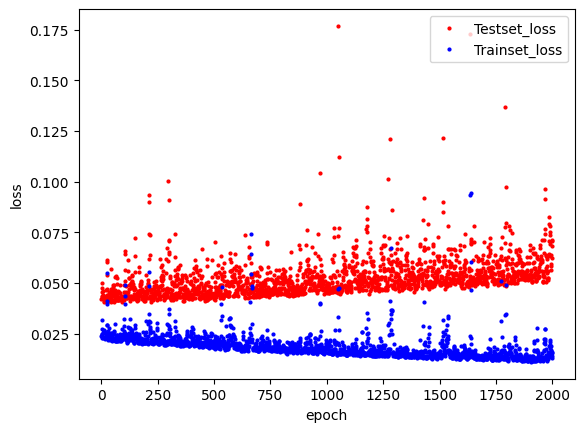

In [ ]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 과적합이 되면서 내려가지 않게 됨
# epochs를 잘 정해야 됨(올라가기 전에 끝냄)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# patience : monitor(val_loss)가 patience(20)번이 되도록 loss가 안떨어지면 반복 종료

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
# 가장 최적의 모델만 저장 save_best_only=True

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=500, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/500
8/8 [==============================] - 0s 64ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.0583 - val_accuracy: 0.9908
Epoch 2/500
6/8 [=====================>........] - ETA: 0s - loss: 0.0112 - accuracy: 0.9980

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 31ms/step - loss: 0.0168 - accuracy: 0.9962 - val_loss: 0.0592 - val_accuracy: 0.9885
Epoch 3/500
8/8 [==============================] - 0s 26ms/step - loss: 0.0145 - accuracy: 0.9964 - val_loss: 0.0568 - val_accuracy: 0.9908
Epoch 4/500
8/8 [==============================] - 0s 19ms/step - loss: 0.0133 - accuracy: 0.9969 - val_loss: 0.0564 - val_accuracy: 0.9915
Epoch 5/500
8/8 [==============================] - 0s 17ms/step - loss: 0.0139 - accuracy: 0.9972 - val_loss: 0.0521 - val_accuracy: 0.9908
Epoch 6/500
8/8 [==============================] - 0s 23ms/step - loss: 0.0182 - accuracy: 0.9949 - val_loss: 0.0512 - val_accuracy: 0.9908
Epoch 7/500
8/8 [==============================] - 0s 36ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0511 - val_accuracy: 0.9908
Epoch 8/500
8/8 [==============================] - 0s 23ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.0555 - val_accuracy: 0.9923
Epoch 9/500
8/8 [===============

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dl_data/data/house_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.MSZoning.value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [ ]:
pd.get_dummies(df.MSZoning)

,C (all),FV,RH,RL,RM
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
1455,False,False,False,True,False
1456,False,False,False,True,False
1457,False,False,False,True,False
1458,False,False,False,True,False


In [ ]:
df = pd.get_dummies(df)
df
# 원핫 인코딩시 접두사/데이터 열 생성, 열 증가 289개

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
df.mean()

Id                         730.500000
MSSubClass                  56.897260
LotFrontage                 70.049958
LotArea                  10516.828082
OverallQual                  6.099315
                             ...     
SaleCondition_AdjLand        0.002740
SaleCondition_Alloca         0.008219
SaleCondition_Family         0.013699
SaleCondition_Normal         0.820548
SaleCondition_Partial        0.085616
Length: 289, dtype: float64

In [ ]:
#결측치를 전체 칼럼의 평균으로 대체하여 채워줍니다.
df = df.fillna(df.mean())

In [ ]:
df.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 289, dtype: int64

In [ ]:
df_corr = df.corr()
df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [ ]:
df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort=df_corr.sort_values('SalePrice', ascending=False)

In [ ]:
#집 값과 관련도가 가장 큰 20개의 속성들을 출력합니다.
df_corr_sort['SalePrice'].head(20)

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
BsmtQual_Ex         0.553105
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
MasVnrArea          0.475241
GarageYrBlt         0.470177
Fireplaces          0.466929
ExterQual_Gd        0.452466
ExterQual_Ex        0.451164
BsmtFinType1_GLQ    0.434597
Name: SalePrice, dtype: float64

In [ ]:
# 양의 상관관계가 높은것 중요,
# 음의 상관관계가 높은 것들(절대값이 큰것)도 모델만들 때 중요

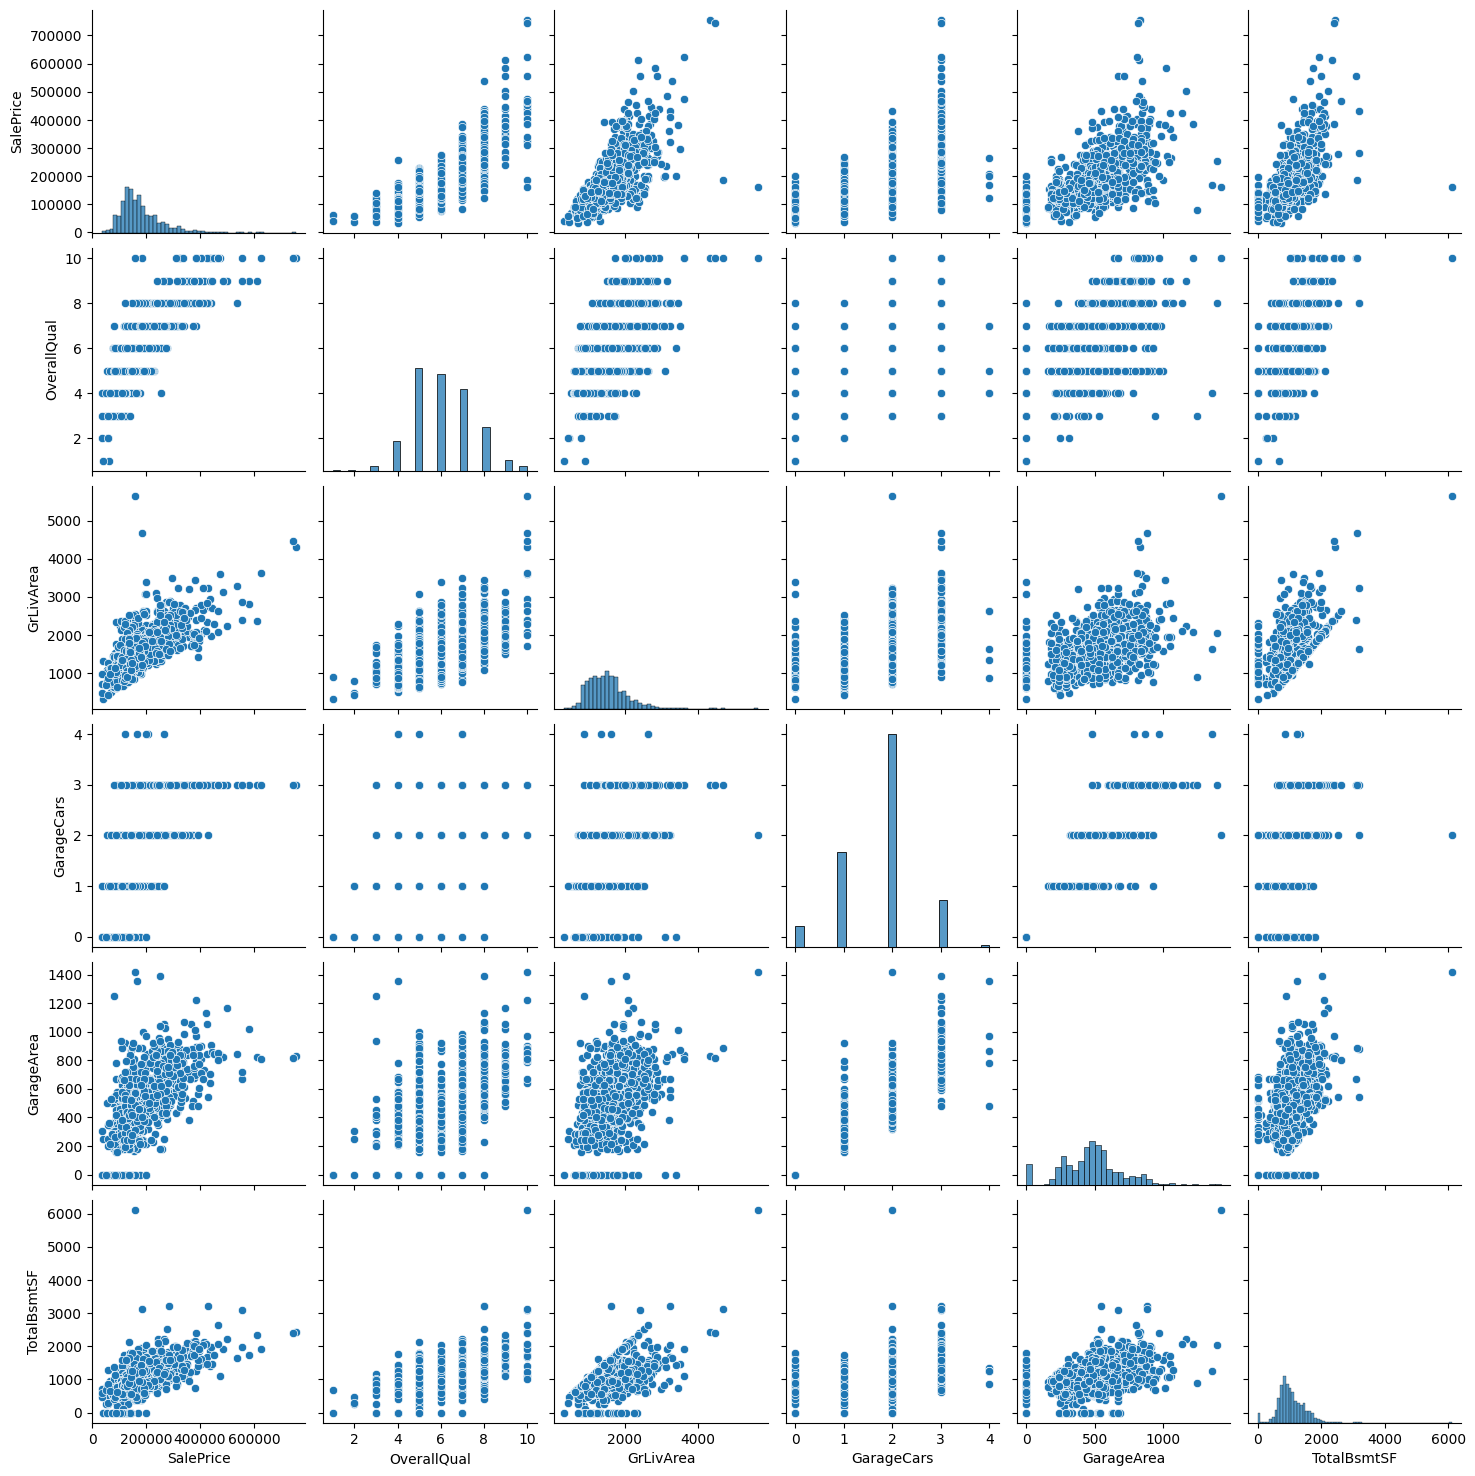

In [ ]:
#집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프를 그려봅니다.
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df[cols])

In [ ]:
#집 값을 제외한 나머지 열을 저장합니다.
cols_train=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train]

#집 값을 저장합니다.
y = df['SalePrice'].values

In [ ]:
#전체의 80%를 학습셋으로, 20%를 테스트셋으로 지정합니다.
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [ ]:
X_train.shape[1] # 차원, 5

5

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1)) # default activation = linear (예측값이 연속값이므로)

In [ ]:
#모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_squared_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath="house_model.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

#실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
28/28 [==============================] - 1s 7ms/step - loss: 2289982208.0000 - val_loss: 2156214528.0000
Epoch 2/2000
28/28 [==============================] - 0s 4ms/step - loss: 2296064000.0000 - val_loss: 2155761920.0000
Epoch 3/2000
 1/28 [>.............................] - ETA: 0s - loss: 865168704.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 0s 3ms/step - loss: 2297481984.0000 - val_loss: 2159255040.0000
Epoch 4/2000
28/28 [==============================] - 0s 4ms/step - loss: 2285932800.0000 - val_loss: 2158278656.0000
Epoch 5/2000
28/28 [==============================] - 1s 19ms/step - loss: 2285777408.0000 - val_loss: 2156557568.0000
Epoch 6/2000
28/28 [==============================] - 0s 3ms/step - loss: 2280323840.0000 - val_loss: 2156458496.0000
Epoch 7/2000
28/28 [==============================] - 0s 4ms/step - loss: 2281250304.0000 - val_loss: 2155056128.0000
Epoch 8/2000
28/28 [==============================] - 0s 4ms/step - loss: 2293265152.0000 - val_loss: 2154428672.0000
Epoch 9/2000
28/28 [==============================] - 0s 5ms/step - loss: 2281255936.0000 - val_loss: 2153657600.0000
Epoch 10/2000
28/28 [==============================] - 0s 4ms/step - loss: 2276621312.0000 - val_loss: 2158332672.0000
Epoch 11/2000
28/28 [==============================] - 0s 5ms/step 

In [ ]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_prices =[]
pred_prices = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

Exception ignored in: <function _xla_gc_callback at 0x7f9120b2e5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


10/10 [==============================] - 0s 3ms/step
실제가격: 155000.00, 예상가격: 161582.48
실제가격: 120500.00, 예상가격: 158931.50
실제가격: 112000.00, 예상가격: 170171.72
실제가격: 159500.00, 예상가격: 256201.91
실제가격: 377426.00, 예상가격: 264284.09
실제가격: 107500.00, 예상가격: 131970.09
실제가격: 112500.00, 예상가격: 124147.51
실제가격: 144000.00, 예상가격: 185726.58
실제가격: 360000.00, 예상가격: 267506.59
실제가격: 210000.00, 예상가격: 194813.16
실제가격: 178000.00, 예상가격: 184737.81
실제가격: 127500.00, 예상가격: 210945.05
실제가격: 148000.00, 예상가격: 171793.53
실제가격: 215000.00, 예상가격: 203839.94
실제가격: 190000.00, 예상가격: 210066.88
실제가격: 114500.00, 예상가격: 157009.19
실제가격: 128500.00, 예상가격: 177099.28
실제가격: 119500.00, 예상가격: 119489.12
실제가격: 167900.00, 예상가격: 198510.95
실제가격: 240000.00, 예상가격: 235452.45
실제가격: 161000.00, 예상가격: 151541.23
실제가격: 142600.00, 예상가격: 234092.67
실제가격: 325000.00, 예상가격: 250028.88
실제가격: 148800.00, 예상가격: 137098.16
실제가격: 205950.00, 예상가격: 191232.19


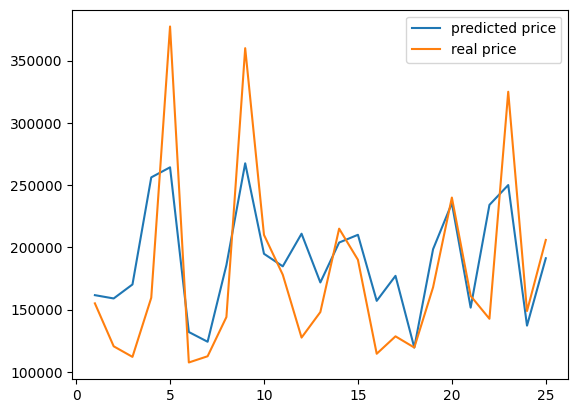

In [ ]:
#그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.

plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()

In [ ]:
# 해당 점수 해보기 과제
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview